In [274]:
import csv
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [275]:
%%time
dataset = pd.read_csv('/home/nuria/Documents/TFG/kdd_cup99/kddcup_10_perBinary.csv', header= None)
headers = list(dataset.columns.values)
#print(headers)

CPU times: user 4.47 s, sys: 701 ms, total: 5.17 s
Wall time: 5.19 s


In [276]:
%%time
#for i in range(41):
#    print("\ni: ",i,"\n",dataset[i].value_counts())

#Eliminar datos Redundantes
dataset.drop(dataset.columns[19], axis= 1, inplace= True)
dataset.drop(dataset.columns[20], axis= 1, inplace= True)

CPU times: user 300 ms, sys: 132 ms, total: 432 ms
Wall time: 420 ms


In [277]:
%%time
#Las tres primeras columnas contienen strings

dataset[1] = dataset[1].astype('category')
dataset[2] = dataset[2].astype('category')
dataset[3] = dataset[3].astype('category')
cat_columns = dataset.select_dtypes(['category']).columns
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)

#print("\nafter:\n",pd.DataFrame(dataset, columns=[0]).dtypes)

CPU times: user 302 ms, sys: 3.83 ms, total: 306 ms
Wall time: 306 ms


In [278]:
%%time
#Eliminar duplicados
dataset.drop_duplicates(subset=None, keep='first', inplace=True)
#print(dataset)

CPU times: user 997 ms, sys: 91.8 ms, total: 1.09 s
Wall time: 1.1 s


In [279]:
%%time
dataset.drop_duplicates(subset=None, keep='first', inplace=True)
#print(dataset)

CPU times: user 450 ms, sys: 274 µs, total: 450 ms
Wall time: 454 ms


In [280]:
%%time
x= dataset.iloc[:, :-1].values
y= dataset.iloc[:, 39].values

CPU times: user 61.2 ms, sys: 0 ns, total: 61.2 ms
Wall time: 78.1 ms


In [281]:
%%time
#-- 70% train 30% test y estratificado--
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, stratify=y)

scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)

scaler = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler.transform(x_test)

CPU times: user 937 ms, sys: 6.55 ms, total: 944 ms
Wall time: 1.02 s


In [282]:
%%time
l_regr= LogisticRegression(max_iter= 400)
# Entrenamiento
l_regr.fit(x_scaled, y_train)
# Prediccion
occup_pred = l_regr.predict(x_test_scaled)

CPU times: user 54.4 s, sys: 87.5 ms, total: 54.5 s
Wall time: 22.6 s


In [283]:
%%time
accuracy = metrics.accuracy_score(y_test, occup_pred)*100
print("Accuracy: ","{:.1f}".format(accuracy),"%")
precision = metrics.precision_score(y_test, occup_pred, pos_label='normal.')*100
print("Precision: ","{:.1f}".format(precision),"%")
recall = metrics.recall_score(y_test, occup_pred, pos_label='normal.')*100
print("Recall: ","{:.1f}".format(recall),"%")

Accuracy:  98.4 %
Precision:  98.0 %
Recall:  99.4 %
CPU times: user 2.56 s, sys: 11.8 ms, total: 2.58 s
Wall time: 2.58 s


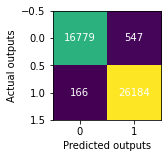

In [284]:
cm= confusion_matrix(y_test, occup_pred)

fig, ax= plt.subplots(figsize=(2,2))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs')
ax.set_ylabel('Actual outputs')
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center', va='center',color='white')
plt.show()